# Лабораторная работа №1. Градиентные методы оптимизации

In [2]:
from sklearn import datasets
from typing import Tuple, Mapping

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.animation as animation
import numpy as np
import math

from IPython.display import HTML

### Функция Швефеля

$f(x, y) = x^2 + (x + y)^2 $, $x, y \in [-10, 10]$

Точка глобального экстремума:

$ min = (0, 0) $

Глобальный экстремум:

$ f(min) = 0$

In [14]:
def func_Shvefel(x: np.ndarray) -> np.float64:
    return x[0] * x[0] + (x[0] + x[1]) ** 2

def grad_Shvefel(x: np.ndarray) -> np.ndarray:
    return np.array([2 * x[0] + 2 * (x[0] + x[1]), 2 * (x[0] + x[1])])

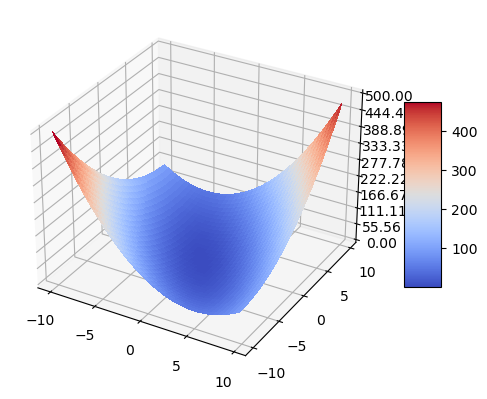

In [15]:
# Make data.
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)
Z = func_Shvefel(np.array([X, Y]))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

### Мультифункция 

$f(x, y) = x * sin(4\pi x) + y * sin(4\pi y)$, $x, y \in [-2, 2]$



Точки глобального экстремума:

$ min_1 = (-1.6288, -1.6288) $

$ min_2 = (1.6288, 1.6288) $

$ min_3 = (-1.6288, 1.6288) $

$ min_4 = (1.6288, -1.6288) $

Глобальный экстремум:

$ f(min) = 4.2539$

In [82]:
def multi_func(x: np.ndarray) -> np.float64:
    return -x[0] * np.sin(4 * np.pi * x[0]) -x[1] * np.sin(4 * np.pi * x[1])

def grad_three_humped_func(x: np.ndarray) -> np.ndarray:
    return np.array([np.sin(4 * np.pi * x[0]) + x[0] * 4 * np.pi * np.cos(4 * np.pi * x[0]), np.sin(4 * np.pi * x[1]) + x[1] * 4 * np.pi * np.cos(4 * np.pi * x[1])])

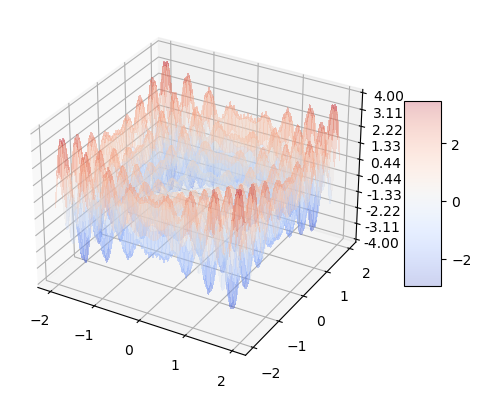

In [130]:
# Make data.
X = np.arange(-2, 2, 0.01)
Y = np.arange(-2, 2, 0.01)
X, Y = np.meshgrid(X, Y)
Z = multi_func(np.array([X, Y]))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.25)

# Customize the z axis.
ax.set_zlim(-4, 4)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

### Градиентный спуск

In [86]:
def my_GD(f: Mapping, df: Mapping, x0: np.ndarray, lr: float = 0.001, max_iter: int = 10000) -> tuple[np.ndarray, np.float32, np.ndarray]:
    '''
    f - optimized function
    df - derivative of the optimized function
    x0 - starting point
    lr - gradient descent step
    max_iter - maximum number of iterations
    
    Returns the minimum point, the value at that point, and the search history
    '''
    
    x_old = x0.copy()
    history = [np.array([x_old[0], x_old[1], f(x_old)])]
    for i in range(max_iter):
        x_new = x_old - lr * df(x_old)
        x_old = x_new
        history.append(np.array([x_new[0], x_new[1], f(x_new)]))

    return x_new, f(x_new), np.array(history)

In [31]:
%matplotlib notebook

### Функция для отрисовки работы градиентного метода

In [131]:
def plot_GD(f: Mapping, df: Mapping, x0: np.ndarray, lr: float = 0.001, max_iter: int = 10000, GD_type: Mapping = my_GD, video_name = "GD", plot_range: list = [-10, 10], z_lim: list = None):
    x1, z1, history = GD_type(f, df, x0, lr, max_iter)
    '''
    f - optimized function
    df - derivative of the optimized function
    x0 - starting point
    lr - gradient descent step
    max_iter - maximum number of iterations
    GD_type - function of the gradient method
    video_name - the name of the file to record the operation of the method
    
    '''

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    
    # Plot the surface.
    X = np.arange(plot_range[0], plot_range[1], 0.01)
    Y = np.arange(plot_range[0], plot_range[1], 0.01)
    X, Y = np.meshgrid(X, Y)
    Z = f(np.array([X, Y]))
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.25)

    # Customize the z axis.
    #ax.set_zlim(-1.01, 1.01)
    if z_lim != None:
        ax.set_zlim(z_lim[0], z_lim[1])
    ax.zaxis.set_major_locator(LinearLocator(10))
    # A StrMethodFormatter is used automatically
    ax.zaxis.set_major_formatter('{x:.02f}')

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
    #xx = ax.scatter(x0[0], x0[1], func_Shvefel(x0), c = 'black')
    
    line, = ax.plot([], [], [], 'r-', label = 'Gradient descent', lw = 1.5)
    point, = ax.plot([], [], [], '*', color = 'black')
    
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([x0[0]], [x0[1]])
    point.set_3d_properties([func_Shvefel(x0)])
    
    def update_point(i):
        i = i + 1
        if (i == len(history)):
            return line, point
        #print(history[:2,0])
        #xx.set_data(history[i][0], history[i][1], history[i][2], c = 'black')
        # Animate line
        line.set_data(history[:i, 0], history[:i, 1])
        line.set_3d_properties(history[:i, 2])

        # Animate points
        point.set_data([history[i][0]], [history[i][1]])
        point.set_3d_properties([history[i][2]])
        return line, point
        
    ani = animation.FuncAnimation(fig, update_point, frames=range(len(history)),interval = 50, blit=True)
    
    writervideo = animation.FFMpegWriter(fps=60)
    ani.save(f'../media/{video_name}.mp4', writer=writervideo)
    return x1[0], x1[1], z1

### Проверка на функции Швефеля

In [88]:
def check_answer_Shvefel(x: np.ndarray, f_val: np.float32):
    '''
    x - the found minimum point
    f_val - value at found minimum point
    '''
    
    x_answer = np.array([0, 0])
    f_answer = 0
    print("Distance to the answer point", math.sqrt((x[0] - x_answer[0]) ** 2 + (x[1] - x_answer[1]) ** 2))
    print("Function value differece", f_val - f_answer)

In [90]:
x, f_val, history = my_GD(func_Shvefel, grad_Shvefel, np.array([10, 10]), max_iter = 5000)

In [91]:
check_answer_Shvefel(x, f_val)

Distance to the answer point 0.07116800290254796
Function value differece 0.0019346137822891848


### Сохраненное видео с демонстрацией лежит по пути ../media/GD.mp4

<IPython.core.display.Javascript object>


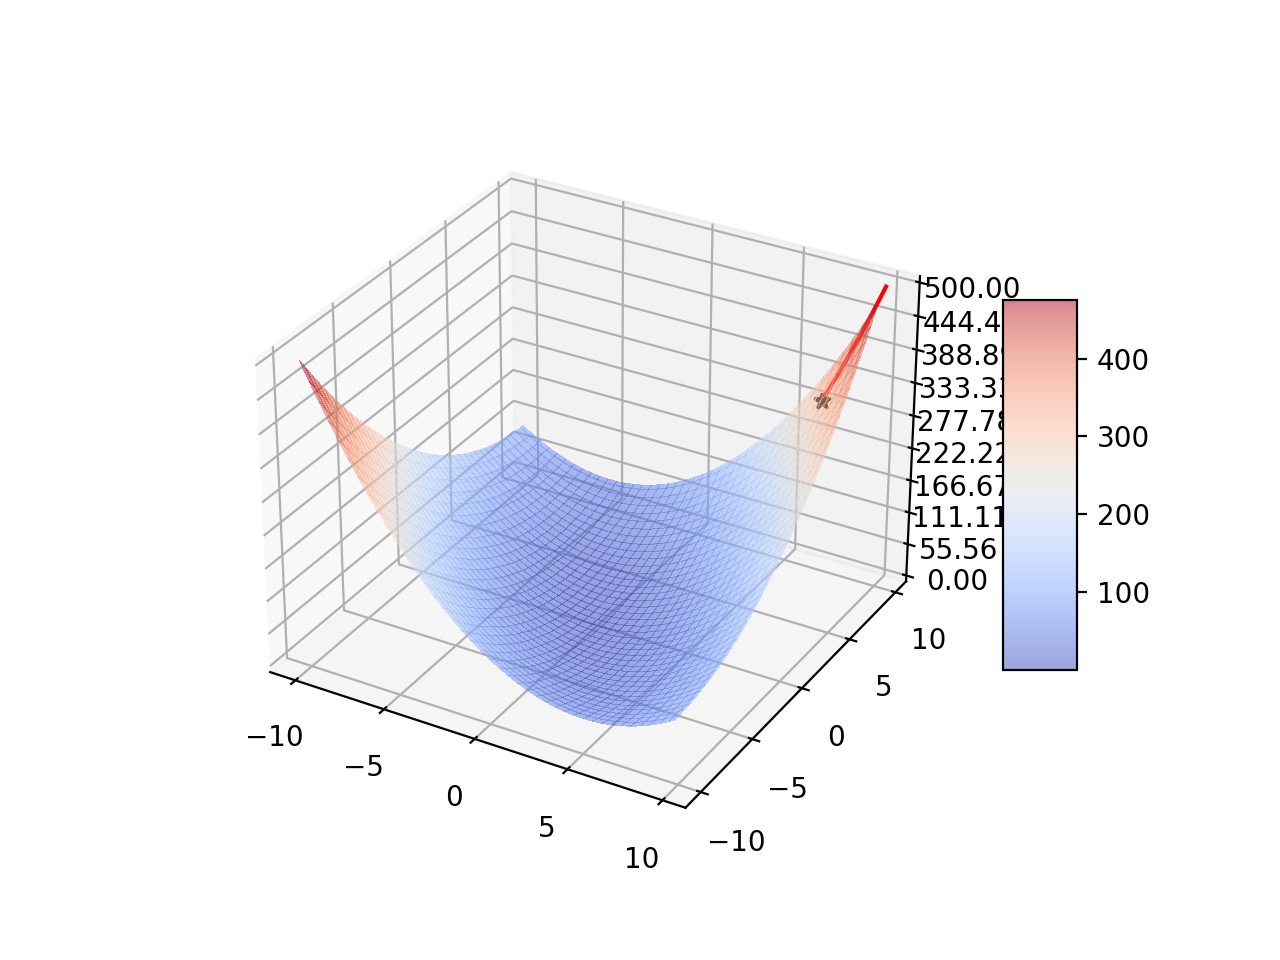

(-0.03741523326662676, 0.06053911922667013, 0.0019346137822891848)

In [60]:
plot_GD(func_Shvefel, grad_Shvefel, np.array([10, 10]), max_iter = 5000)

### Проверка на мультифункции

In [110]:
def check_answer_multifunc(x: np.ndarray, f_val: np.float32):
    '''
    x - the found minimum point
    f_val - value at found minimum point
    '''
    
    x_list = [np.array([-1.6288, -1.6288]), np.array([-1.6288, 1.6288]),
                np.array([1.6288, -1.6288]), np.array([1.6288, 1.6288])]
    f_answer = -4.2539
    
    min_dist = min([math.sqrt((x[0] - x_answer[0]) ** 2 + (x[1] - x_answer[1]) ** 2) for x_answer in x_list])

    print("Distance to the answer point", min_dist)
    print("Function value differece", f_val - f_answer)

In [150]:
x, f_val, history = my_GD(multi_func, grad_three_humped_func, np.array([0, 1]), max_iter = 1000)

In [151]:
check_answer_multifunc(x, f_val)

Distance to the answer point 1.791776227098685
Function value differece 5.132491627984786


### Градиентный спуск не справился, зависнув на первом пике

#### Видео с демонстрацией доступно по пути ../media/GD_on_multi

(0.0, 0.8821591171145272, 0.8785916279847861)

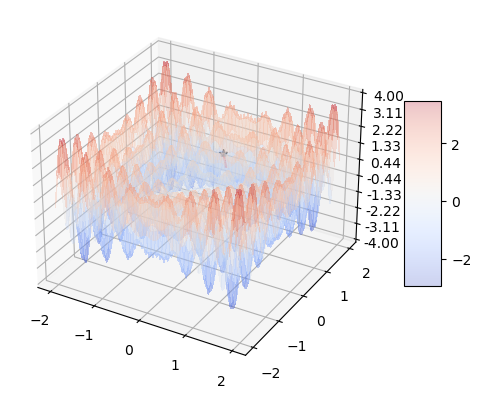

In [132]:
plot_GD(multi_func, grad_three_humped_func, np.array([0, 1]), max_iter = 500, video_name = "GD_on_multi", plot_range = [-2, 2], z_lim = [-4, 4])

### Метод импульсов

In [138]:
def impulse_method(f: Mapping, df: Mapping, x0: np.ndarray, lr: float = 0.001, max_iter: int = 10000, gamma: float = 0.9) -> tuple[np.ndarray, np.float32, np.ndarray]:
    '''
    f - optimized function
    df - derivative of the optimized function
    x0 - starting point
    lr - gradient descent step
    max_iter - maximum number of iterations
    gamma - moment coefficient
    '''
    if (gamma > 1 or gamma < 0):
        print('incorrect gamma. Set default gamma = 0.9')
        gamma = 0.9
    
    x_old = x0.copy()
    u = 0
    history = [np.array([x_old[0], x_old[1], f(x_old)])]
    for i in range(max_iter):
        u = gamma * u + lr * df(x_old)
        x_new = x_old - u
        x_old = x_new
        history.append(np.array([x_new[0], x_new[1], f(x_new)]))

    return x_new, f(x_new), np.array(history)

In [139]:
x, f_val, history = impulse_method(func_Shvefel, grad_Shvefel, np.array([10, 10]), gamma = 0.6, max_iter = 5000)

### При проверке на функции Швелея точка ответа ближе, чем при обычном градиентном спуске

In [140]:
check_answer_Shvefel(x, f_val)

Distance to the answer point 0.00022383625747729533
Function value differece 1.913751707454568e-08


<IPython.core.display.Javascript object>


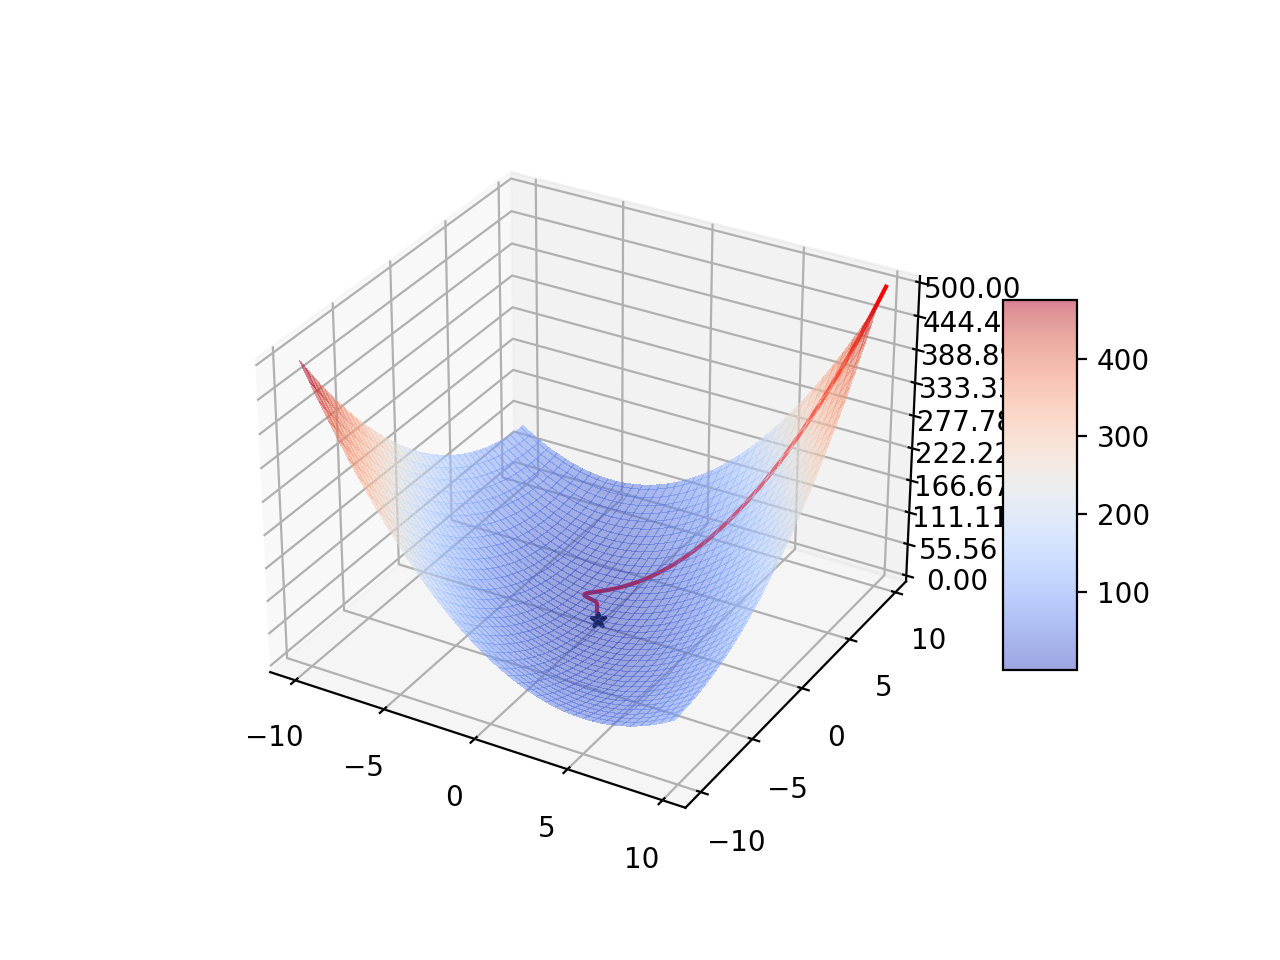

(-1.8016528940104995e-36, 2.915135618438599e-36, 4.485796928096231e-72)

In [68]:
plot_GD(func_Shvefel, grad_Shvefel, np.array([10, 10]), GD_type = impulse_method, video_name = "impulse_GD")

### Для мультифункции добавление момента ничего не поменяло

In [154]:
x, f_val, history = impulse_method(multi_func, grad_three_humped_func, np.array([0, 1]), gamma = 0.9, max_iter = 1000)

In [155]:
check_answer_multifunc(x, f_val)

Distance to the answer point 1.7917762270986852
Function value differece 5.132491627984786


### Adam

In [156]:
def Adam(f: Mapping, df: Mapping, x0: np.ndarray, lr: float = 0.001, max_iter: int = 10000, beta1: float = 0.9, beta2: float = 0.999, eps: float = 10e-8) -> tuple[np.ndarray, np.float32, np.ndarray]:
    '''
    f - optimized function
    df - derivative of the optimized function
    x0 - starting point
    lr - gradient descent step
    max_iter - maximum number of iterations
    beta1 - moment 1 coefficient
    beta2 - moment 2 coefficient
    eps - adding to the denominator to avoid division by zero
    '''
    if (beta1 > 1 or beta1 < 0):
        print('incorrect beta1. Set default beta1 = 0.9')
        beta1 = 0.9
    
    if (beta2 > 1 or beta2 < 0):
        print('incorrect beta2. Set default beta1 = 0.999')
        beta2 = 0.999
    
    x_old = x0.copy()
    u = 0
    m = 0
    v = 0
    
    history = [np.array([x_old[0], x_old[1], f(x_old)])]
    for i in range(max_iter):
        m = beta1 * m + (1 - beta1) * df(x_old)
        v = beta2 * v + (1 - beta2) * df(x_old)
        u = lr * m / (np.sqrt(v) + eps)
        x_new = x_old - u
        x_old = x_new
        history.append(np.array([x_new[0], x_new[1], f(x_new)]))

    return x_new, f(x_new), np.array(history)

In [161]:
x, f_val, history = Adam(func_Shvefel, grad_Shvefel, np.array([10, 10]), max_iter = 6000)

### Для функции Швефеля Адам при стандартных коэффициентах и максимальном числе эпох 6000 дал отличный результат, но немного хуже метода импульсов

In [162]:
check_answer_Shvefel(x, f_val)

Distance to the answer point 0.03307260964458231
Function value differece 0.00042048304999942694


<IPython.core.display.Javascript object>


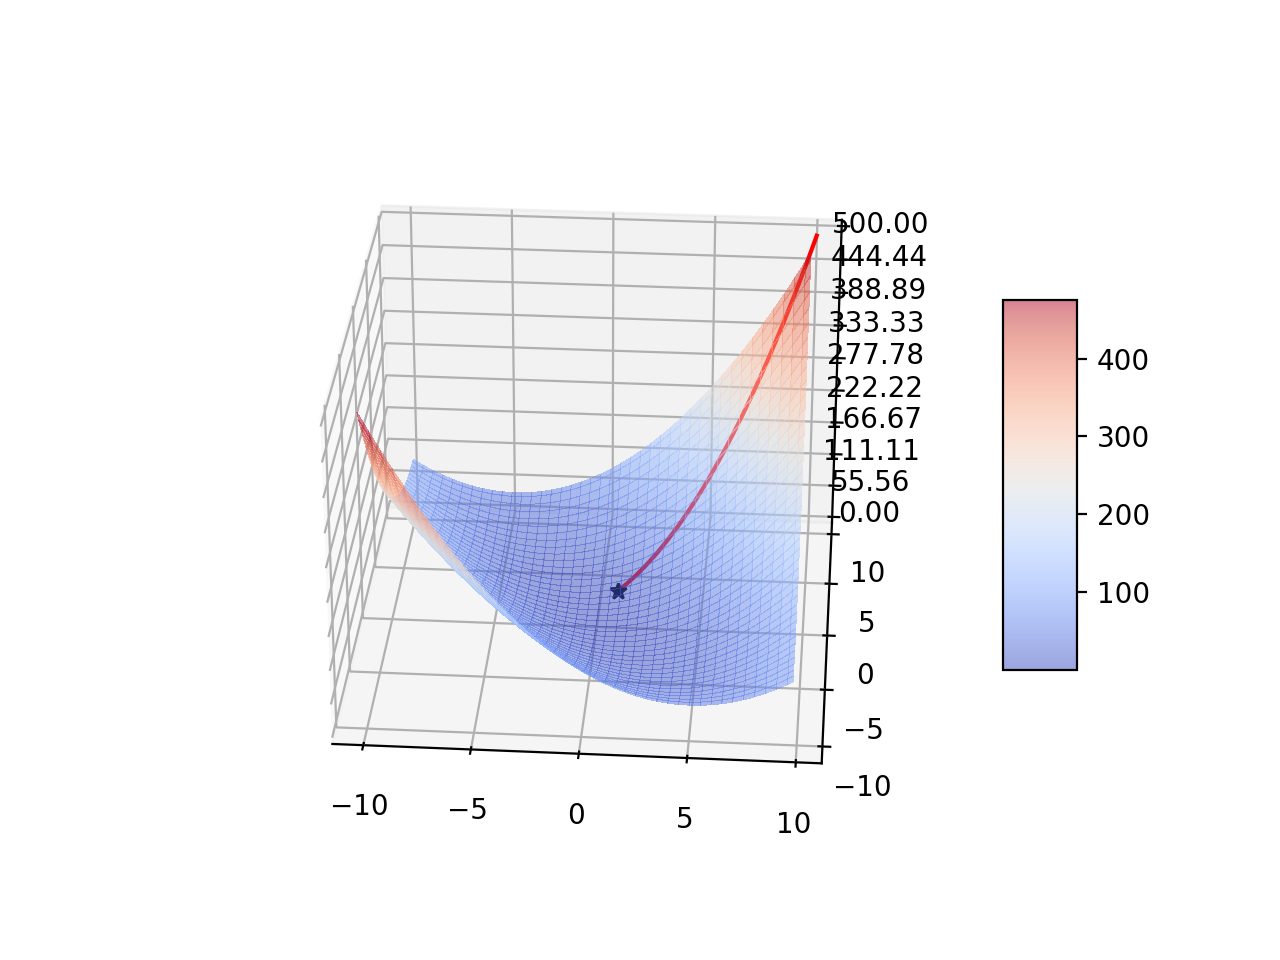

(-0.0738612238837574, 0.12606530950018796, 0.008180746948654147)

In [75]:
plot_GD(func_Shvefel, grad_Shvefel, np.array([10, 10]), max_iter = 5000, GD_type = Adam, video_name = "Adam")

### Для мультифункции Адам также не решил проблему

In [167]:
x, f_val, history = Adam(multi_func, grad_three_humped_func, np.array([0, 1]), max_iter = 1000)

In [168]:
check_answer_multifunc(x, f_val)

Distance to the answer point 1.7917762270986852
Function value differece 5.132491627984786


### Learning rate scheduler

In [169]:
def lr_scheduler(f: Mapping, df: Mapping, x0: np.ndarray, type: str, lr: float = 0.01, max_iter: int = 10000) -> tuple[np.ndarray, np.float32, np.ndarray]:
    '''
    f - optimized function
    df - derivative of the optimized function
    x0 - starting point
    type - can be linear or exponential
    lr - gradient descent step
    max_iter - maximum number of iterations
    '''
    
    if type not in ('linear', 'exponential'):
        print("incorrect type")
        return

    x_old = x0.copy()
    history = [np.array([x_old[0], x_old[1], f(x_old)])]
    for i in range(max_iter):
        if type == "linear":
            lr = lr * (1 - float(i) / max_iter)
        else:
            lr = lr * math.exp(-float(i) / max_iter)
        x_new = x_old - lr * df(x_old)
        x_old = x_new
        history.append(np.array([x_new[0], x_new[1], f(x_new)]))

    return x_new, f(x_new), np.array(history)

In [170]:
x, f_val, history = lr_scheduler(func_Shvefel, grad_Shvefel, np.array([10, 10]), type = "linear", max_iter = 5000)

### Наихудший результат из всех методов для функции Швефеля

In [171]:
check_answer_Shvefel(x, f_val)

Distance to the answer point 1.656809552826573
Function value differece 1.0827714050262436


### Что бы вы думали: ноль эффекта для мультифункции

In [174]:
x, f_val, history = lr_scheduler(multi_func, grad_three_humped_func, np.array([0, 1]), type = "linear", max_iter = 5000)

In [175]:
check_answer_multifunc(x, f_val)

Distance to the answer point 1.7917762270986852
Function value differece 5.132491627984786
